In [25]:
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.datasets import make_classification
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [26]:
# X, y = make_classification(random_state=1, n_features=50, n_informative=5, n_redundant=0)
# X = pd.DataFrame(X)
df = pd.read_csv('../Resources/ml_data.csv')
df.pop('ID')

X = df.drop('Complain', axis=1)
y = df['Complain'] != 1

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [28]:
clf = RandomForestClassifier(random_state=1, n_estimators=500).fit(X_train_scaled, y_train)
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

Training Score: 1.0
Testing Score: 0.9873646209386282


In [29]:
feature_importances = clf.feature_importances_

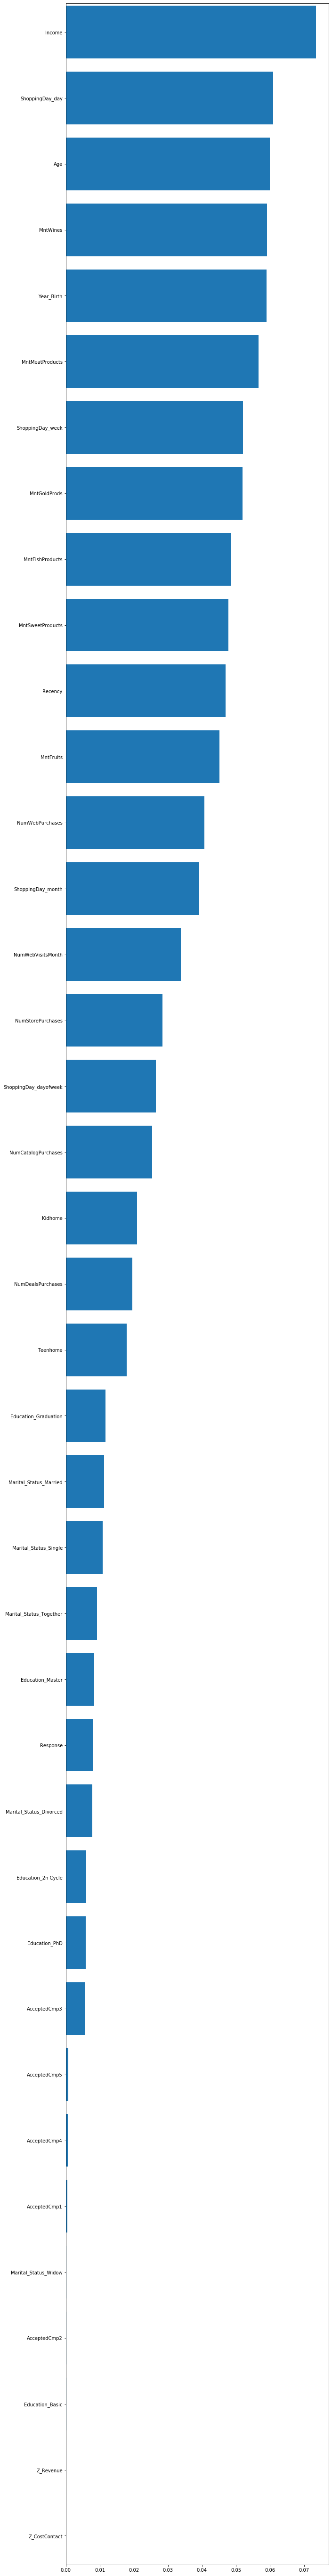

In [30]:
features = sorted(zip(X.columns, clf.feature_importances_), key = lambda x: x[1])
cols = [f[0] for f in features]
width = [f[1] for f in features]

fig, ax = plt.subplots()

fig.set_size_inches(10,100)
plt.margins(y=0.001)

ax.barh(y=cols, width=width)

plt.show()

In [31]:
from sklearn.feature_selection import SelectFromModel
sel = SelectFromModel(clf)
sel.fit(X_train_scaled, y_train)

SelectFromModel(estimator=RandomForestClassifier(n_estimators=500,
                                                 random_state=1))

In [32]:
X_selected_train, X_selected_test, y_train, y_test = train_test_split(sel.transform(X), y, random_state=1)
scaler = StandardScaler().fit(X_selected_train)
X_selected_train_scaled = scaler.transform(X_selected_train)
X_selected_test_scaled = scaler.transform(X_selected_test)

In [33]:
clf = LogisticRegression().fit(X_train_scaled, y_train)
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

Training Score: 0.9921780986762936
Testing Score: 0.9855595667870036


In [34]:
clf = LogisticRegression()
clf.fit(X_selected_train_scaled, y_train)
print(f'Training Score: {clf.score(X_selected_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_selected_test_scaled, y_test)}')

Training Score: 0.9921780986762936
Testing Score: 0.9855595667870036


In [35]:
X = df.drop('Complain', axis=1)
y = df['Complain'] != 1
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

Model: Linear Regression
Score: 0.001348805306878531



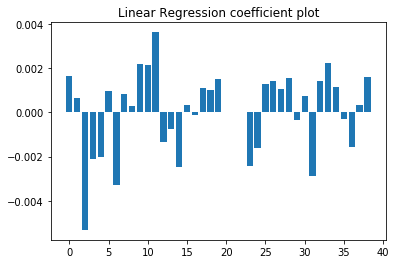

In [36]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X_train_scaled, y_train)
print('Model: Linear Regression')
print(f'Score: {reg.score(X_test_scaled, y_test)}\n')
plt.bar(np.arange(len(reg.coef_)), reg.coef_)
plt.title(f'Linear Regression coefficient plot')
plt.show()    

Model: LASSO
Score: -0.003077940577940641



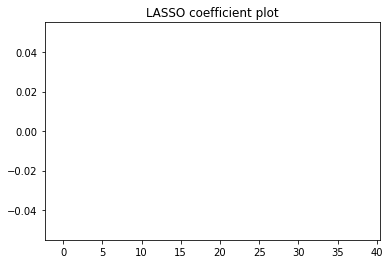

In [37]:
from sklearn.linear_model import Lasso

reg = Lasso(max_iter=2000).fit(X_train_scaled, y_train)
print('Model: LASSO')
print(f'Score: {reg.score(X_test_scaled, y_test)}\n')
plt.bar(np.arange(len(reg.coef_)), reg.coef_)
plt.title(f'LASSO coefficient plot')
plt.show()    

Model: Ridge
Score: 0.0013516570384467519



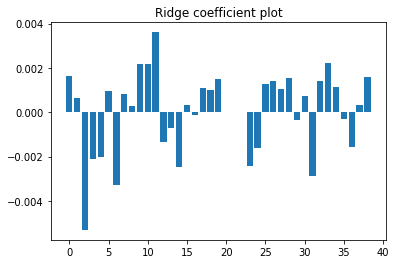

In [38]:
from sklearn.linear_model import Ridge

reg = Ridge().fit(X_train_scaled, y_train)
print('Model: Ridge')
print(f'Score: {reg.score(X_test_scaled, y_test)}\n')
plt.bar(np.arange(len(reg.coef_)), reg.coef_)
plt.title(f'Ridge coefficient plot')
plt.show()    

Model: ElasticNet
Score: -0.003077940577940641



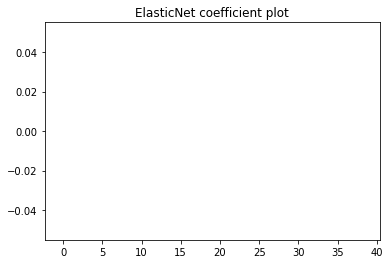

In [39]:
from sklearn.linear_model import ElasticNet

reg = ElasticNet(max_iter=2000).fit(X_train_scaled, y_train)
print('Model: ElasticNet')
print(f'Score: {reg.score(X_test_scaled, y_test)}\n')
plt.bar(np.arange(len(reg.coef_)), reg.coef_)
plt.title(f'ElasticNet coefficient plot')
plt.show()    

In [40]:
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.datasets import make_regression, make_swiss_roll
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [41]:
def test_model(model, data):
    X_train_scaled, X_test_scaled, y_train, y_test = data
    reg = model.fit(X_train_scaled, y_train)
    print(f'Model: {type(reg).__name__}')
    print(f'Train score: {reg.score(X_train_scaled, y_train)}')
    print(f'Test Score: {reg.score(X_test_scaled, y_test)}\n')
    plt.show()    

In [42]:
X = df.drop('Complain', axis=1)
y = df['Complain'] != 1
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
data = [X_train_scaled, X_test_scaled, y_train, y_test]

In [43]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, AdaBoostRegressor
from sklearn.svm import SVR

In [44]:
test_model(LinearRegression(), data)

test_model(KNeighborsRegressor(), data)
test_model(RandomForestRegressor(), data)
test_model(ExtraTreesRegressor(), data)
test_model(AdaBoostRegressor(), data)
test_model(SVR(C=1.0, epsilon=0.2), data)

Model: LinearRegression
Train score: 0.011434139480647865
Test Score: 0.001348805306878531

Model: KNeighborsRegressor
Train score: 0.22160376918412072
Test Score: -0.029871794871795032

Model: RandomForestRegressor
Train score: 0.8356762140224845
Test Score: 0.09424551282051297

Model: ExtraTreesRegressor
Train score: 1.0
Test Score: 0.020366163003663007

Model: AdaBoostRegressor
Train score: -0.06505187944791979
Test Score: -0.24117175931479728

Model: SVR
Train score: -2.562874619969516
Test Score: -1.4469125822740079



In [45]:
import mpl_toolkits.mplot3d.axes3d as p3
# #############################################################################
# Plot the result
fig = plt.figure()
ax = p3.Axes3D(fig)
ax.view_init(7, -80)
ax.scatter(X[0] X[1], X[2],
           color=plt.cm.jet(y/y.max()),
           s=20, edgecolor='k')
plt.show()

SyntaxError: invalid syntax (<ipython-input-45-d947f8fd19ed>, line 7)